The NYC School Zones Map (2024–2025) dataset obtained from the NYC Open Data portal. The objective of this notebook is to explore and visualize this geospatial dataset using Python libraries such as GeoPandas, Matplotlib, Folium, and Contextily.

In [ ]:
#Installing Required Packs
#%pip install geopandas
#%pip install folium
#%pip install contextily
#%pip install mapclassify
#%pip install overpy
#%pip install shapely

   ---------------------------------------- 0.0/23.6 MB ? eta -:--:--
    --------------------------------------- 0.5/23.6 MB 3.7 MB/s eta 0:00:07
   - -------------------------------------- 1.0/23.6 MB 2.7 MB/s eta 0:00:09
   - -------------------------------------- 1.0/23.6 MB 2.7 MB/s eta 0:00:09
   -- ------------------------------------- 1.3/23.6 MB 1.4 MB/s eta 0:00:16
   -- ------------------------------------- 1.3/23.6 MB 1.4 MB/s eta 0:00:16
   --- ------------------------------------ 1.8/23.6 MB 1.3 MB/s eta 0:00:17
   --- ------------------------------------ 2.1/23.6 MB 1.3 MB/s eta 0:00:17
   ---- ----------------------------------- 2.4/23.6 MB 1.3 MB/s eta 0:00:17
   ---- ----------------------------------- 2.6/23.6 MB 1.3 MB/s eta 0:00:16
   ----- ---------------------------------- 3.1/23.6 MB 1.4 MB/s eta 0:00:15
   ------ --------------------------------- 3.7/23.6 MB 1.5 MB/s eta 0:00:14
   ------- -------------------------------- 4.2/23.6 MB 1.6 MB/s eta 0:00:13
   ---


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   -------- ------------------------------- 1/5 [MarkupSafe]
   ---------------- ----------------------- 2/5 [jinja2]
   ---------------- ----------------------- 2/5 [jinja2]
   ---------------- ----------------------- 2/5 [jinja2]
   ------------------------ --------------- 3/5 [branca]
   -------------------------------- ------- 4/5 [folium]
   -------------------------------- ------- 4/5 [folium]
   -------------------------------- ------- 4/5 [folium]
   -------------------------------- ------- 4/5 [folium]
   ---------------------------------------- 5/5 [folium]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.3 MB 4.7 MB/s eta 0:00:02
   ----- ---------------------------------- 1.0/8.3 MB 3.2 MB/s eta 0:00:03
   -------- ------------------------------- 1.8/8.3 MB 2.7 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/8.3 MB 2.6 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.3 MB 2.5 MB/s eta 0:00:03
   ------------- -------------------------- 2.9/8.3 MB 2.3 MB/s eta 0:00:03
   ---------------- ----------------------- 3.4/8.3 MB 2.1 MB/s eta 0:00:03
   ----------------- ---------------------- 3.7/8.3 MB 2.2 MB/s eta 0:00:03
   -------------------- ------------------- 4.2/8.3 MB 2.1 MB/s eta 0:00:02
   --------------------- ------------------ 4.5/8.3 MB 2.1 MB/s eta 0:00:02
   ------------------------ --------------- 5.0/8.3 MB 2.0 MB/s eta 0:00:02
   -------------------------- ------------- 5.5/8.3 MB 2.1 MB/s eta 0:00:02
   ----------------


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/882.2 kB ? eta -:--:--
   ----------------------------------- ---- 786.4/882.2 kB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 882.2/882.2 kB 3.6 MB/s  0:00:00
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/2.1 MB 3.4 MB/s eta 0:00:01
   -------------------- ------------------- 1.0/2.1 MB 2.9 MB/s eta 0:00:01
   ------------------------------ --------- 1.6/2.1 MB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 2.7 MB/s  0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 2.5 MB/s eta 0:00:03
   ------- -------------------------------- 1.6/8.1 MB 2.6 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/8.1 MB 2.8 MB/s eta 0:00:03
   ------------ --------------------


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import folium
import contextily as ctx
import mapclassify
from shapely.geometry import Point
import overpy

In [5]:
#Loading the dataset
url = "https://raw.githubusercontent.com/husseinareefurrahman-collab/KFUPM-ISE571/main/Assignment%201/NYC_School_Zones.geojson"

gdf = gpd.read_file(url)

print(gdf.head())
print("\nCRS:", gdf.crs)

                  :id           :version                      :created_at  \
0  row-94ba-x242_dtku  rv-5894~qpmz~2imp 2024-03-13 18:13:37.343000+00:00   
1  row-4puf-7pk8-kvkz  rv-t9tr-axm3-3ztc 2024-03-13 18:13:37.343000+00:00   
2  row-57p2.izir~n48g  rv-k495~hgpn~e6xs 2024-03-13 18:13:37.343000+00:00   
3  row-jnz4_u6ih~hazb  rv-35an_fea7.8bqb 2024-03-13 18:13:37.343000+00:00   
4  row-ahwh.kf75-idnh  rv-37uy~7cx7.9h6d 2024-03-13 18:13:37.343000+00:00   

                       :updated_at                     sch_name catchment  \
0 2024-03-13 18:13:37.343000+00:00  Citywide High School Choice         0   
1 2024-03-13 18:13:37.343000+00:00  HARRY S. TRUMAN HIGH SCHOOL         0   
2 2024-03-13 18:13:37.343000+00:00  Citywide High School Choice         0   
3 2024-03-13 18:13:37.343000+00:00  Citywide High School Choice         0   
4 2024-03-13 18:13:37.343000+00:00  Citywide High School Choice         0   

  boro hsid_no     dbn                      remarks   label zoned_dist  \


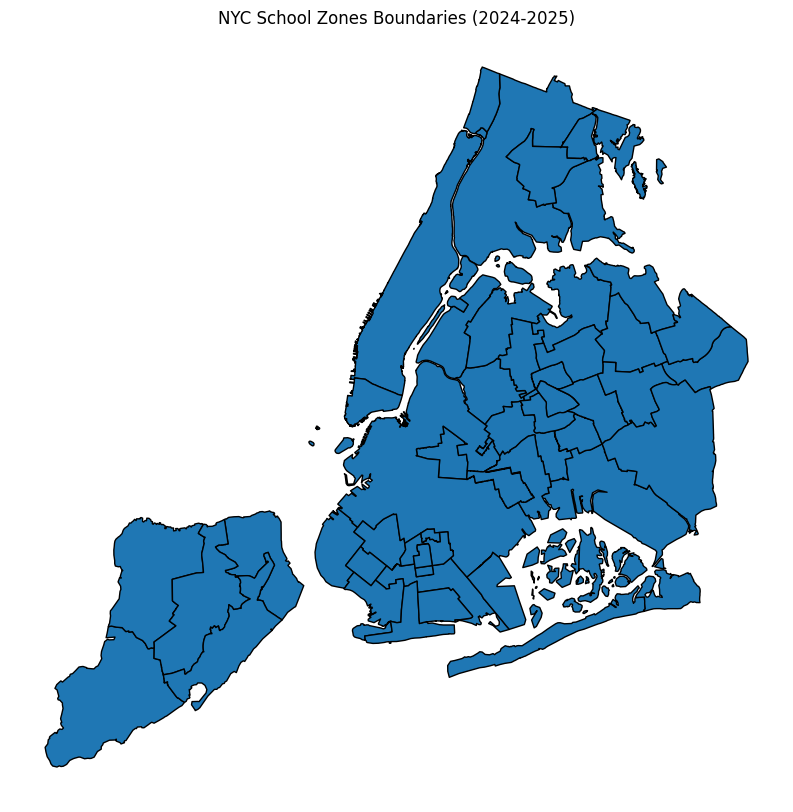

In [6]:
#Basic boundary map
fig, ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax, edgecolor='black')
ax.set_title("NYC School Zones Boundaries (2024-2025)")
ax.set_axis_off()
plt.show()

The map shows that school zones vary significantly in size across boroughs. Manhattan zones appear more compact and densely packed, while zones in outer boroughs such as Queens and Brooklyn are geographically larger. This reflects urban density differences across New York City.

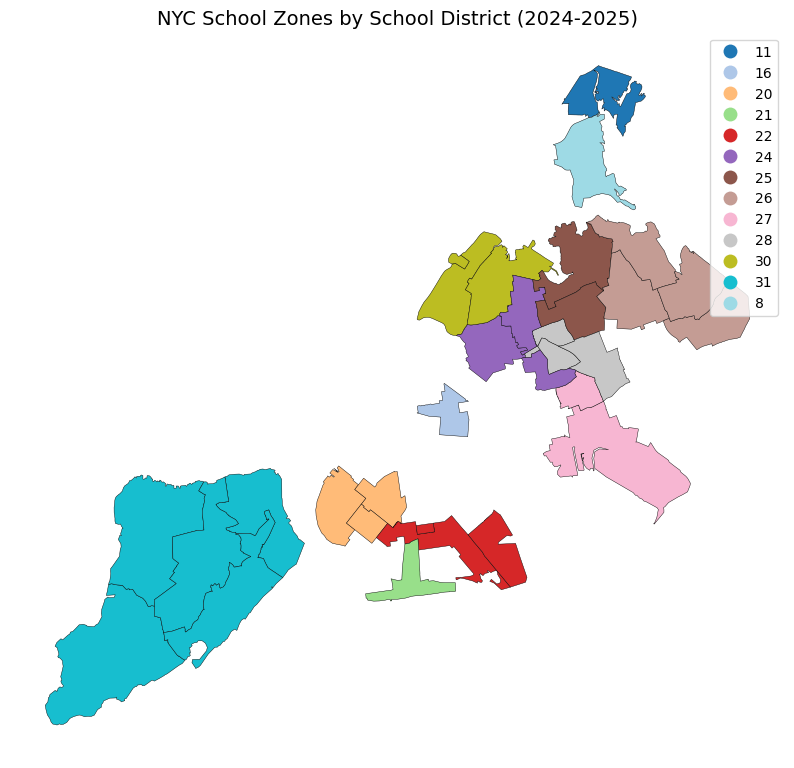

In [9]:
fig, ax = plt.subplots(figsize=(10,10))

gdf.plot(
    column='schooldist',
    cmap='tab20',
    legend=True,
    categorical=True,
    edgecolor='black',
    linewidth=0.3,
    ax=ax
)

ax.set_title("NYC School Zones by School District (2024-2025)", fontsize=14)
ax.set_axis_off()

plt.show()

The categorical choropleth map shows how school districts are geographically distributed across New York City.

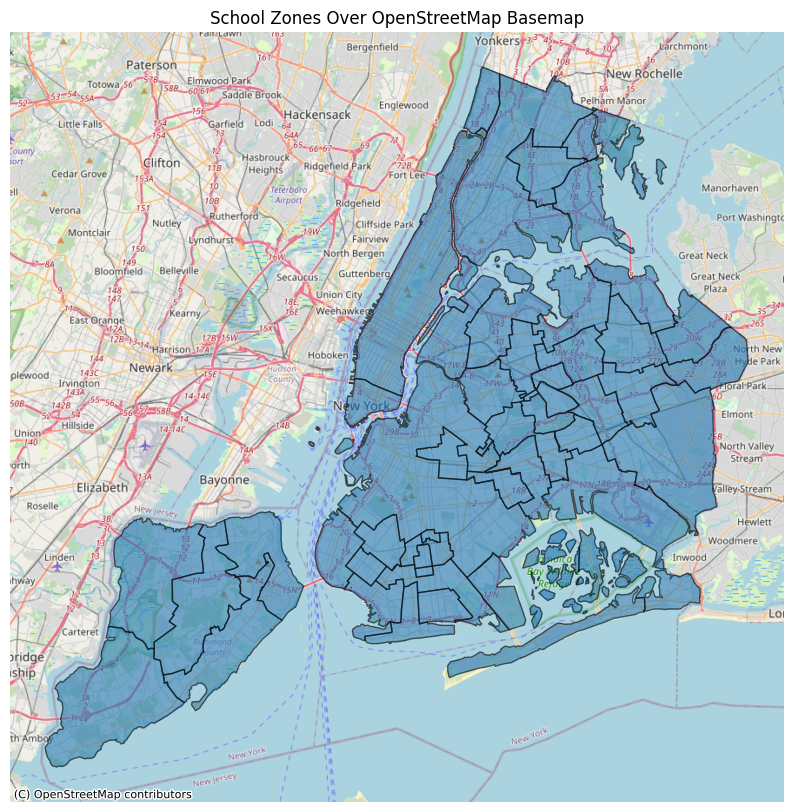

In [10]:
gdf_web = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10,10))
gdf_web.plot(ax=ax, alpha=0.6, edgecolor='black')

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_title("School Zones Over OpenStreetMap Basemap")
ax.set_axis_off()
plt.show()

We can observe that school zones align with major roads, neighborhoods, and borough boundaries. This confirms that zoning decisions likely consider transportation access and residential patterns.

C:\Users\Hussein A. Rahman\AppData\Local\Temp\ipykernel_13964\3731604334.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_centroids['geometry'] = gdf_centroids.geometry.centroid


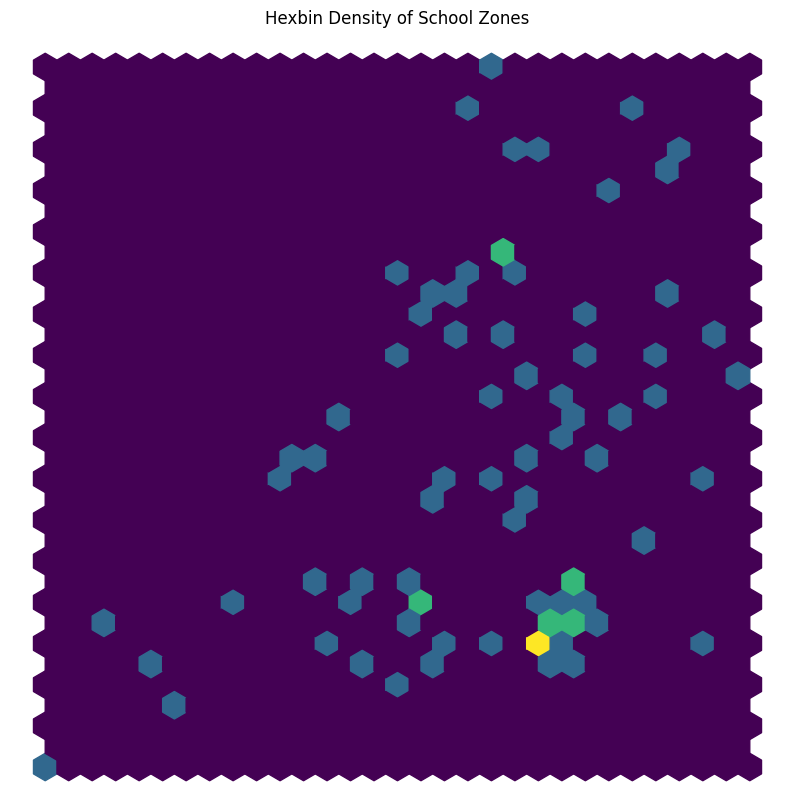

In [12]:
gdf_centroids = gdf.copy()
gdf_centroids['geometry'] = gdf_centroids.geometry.centroid
x = gdf_centroids.geometry.x
y = gdf_centroids.geometry.y
plt.figure(figsize=(10,10))
plt.hexbin(x, y, gridsize=30)
plt.title("Hexbin Density of School Zones")
plt.axis("off")
plt.show()

The hexbin density map shows different concentrations of school zones, which indicates the probable cause of distribution as population density.

In [15]:
gdf_folium = gdf.copy()

for col in gdf_folium.columns:
    if str(gdf_folium[col].dtype).startswith("datetime"):
        gdf_folium[col] = gdf_folium[col].astype(str)

gdf_folium = gdf_folium.to_crs(epsg=4326)

center = [
    gdf_folium.geometry.centroid.y.mean(),
    gdf_folium.geometry.centroid.x.mean()
]

m = folium.Map(location=center, zoom_start=10)

folium.GeoJson(
    gdf_folium,
    name="School Zones"
).add_to(m)

m

C:\Users\Hussein A. Rahman\AppData\Local\Temp\ipykernel_13964\1964361428.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_folium.geometry.centroid.y.mean(),
C:\Users\Hussein A. Rahman\AppData\Local\Temp\ipykernel_13964\1964361428.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_folium.geometry.centroid.x.mean()


The interactive map enables dynamic exploration of school zones across New York City. Users can zoom into specific neighborhoods and visually compare the size and distribution of zones.